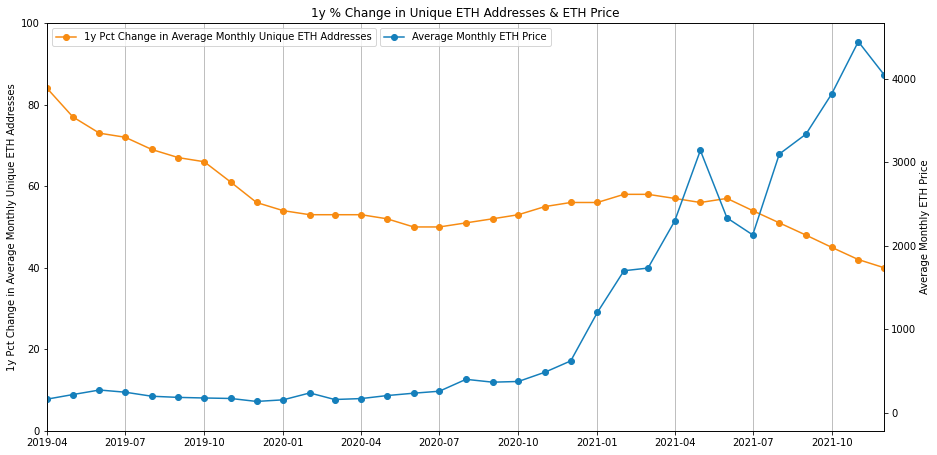

In [63]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
import datetime as dt
import matplotlib.dates as mdates


#read in Unique ETH Address data, format and group by month and calculate mean
eth_data = pd.read_csv('/Users/broderickbonelli/Desktop/ETHUniqueAddresses.csv')
eth_data.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
eth_data.set_index(eth_data['Date(UTC)'], drop=True)
eth_data['Date(UTC)'] = pd.to_datetime(eth_data['Date(UTC)'], format='%m/%d/%Y')
eth_data = eth_data.rename({'Date(UTC)':'Date'}, axis=1)
eth_data['Value'] = pd.to_numeric(eth_data['Value'])
eth_data = eth_data['Value'].groupby(eth_data['Date'].dt.to_period('m')).mean()

#read in ETH price data, format and group by month and calculate mean
eth_price_data = pd.read_csv('/Users/broderickbonelli/Desktop/ETH_USD.csv')
eth_price_data['Date'] = pd.to_datetime(eth_price_data['Date'], format='%Y-%m-%d')
eth_price_data = eth_price_data['Closing Price (USD)'].groupby(eth_price_data['Date'].dt.to_period('m')).mean()

#put into dataframes
eth_df1 = pd.DataFrame(eth_data)
eth_df2 = pd.DataFrame(eth_price_data)

#reset indexes inplace so I can merge by 'Date' columns
eth_df1.reset_index(inplace=True)
eth_df2.reset_index(inplace=True)

#merge into new dataframe and calculate Percent Change column
eth_df3 = pd.merge(eth_df1, eth_df2)
eth_df3['Value Pct Change'] = eth_df3['Value'].pct_change(periods=12)
eth_df3['Value Pct Change'] = [each * 100 for each in eth_df3['Value Pct Change'].round(2)]

#set image size
plt.rcParams['figure.figsize'] = [15, 7.5]


#conform date format so x axis charts correctly; chart % change in wallets
date_fmt = '%Y-%m'
dt_x = [dt.datetime.strptime(str(i), date_fmt) for i in eth_df3['Date']]
eth_x = [mdates.date2num(i) for i in dt_x]

#create figure, plot Value Pct Change and ETH Price on twin y-axis'
fig, ax=plt.subplots()
ax.plot_date(eth_x, eth_df3['Value Pct Change'], linestyle='solid', color='#f78b12')
ax.set_ylabel('1y Pct Change in Average Monthly Unique ETH Addresses')
ax.xaxis.grid()
ax.set_ylim(0, 100)

ax2 = ax.twinx()
ax2.plot_date(eth_x, eth_df3['Closing Price (USD)'], color='#157fbb', linestyle='solid')
ax2.set_ylabel('Average Monthly ETH Price')
ax2.set_xlim(17987.0, 18962.0)
ax2.set_title('1y % Change in Unique ETH Addresses & ETH Price')
ax.legend(['1y Pct Change in Average Monthly Unique ETH Addresses'], loc=2)
ax2.legend(['Average Monthly ETH Price'], loc=9)

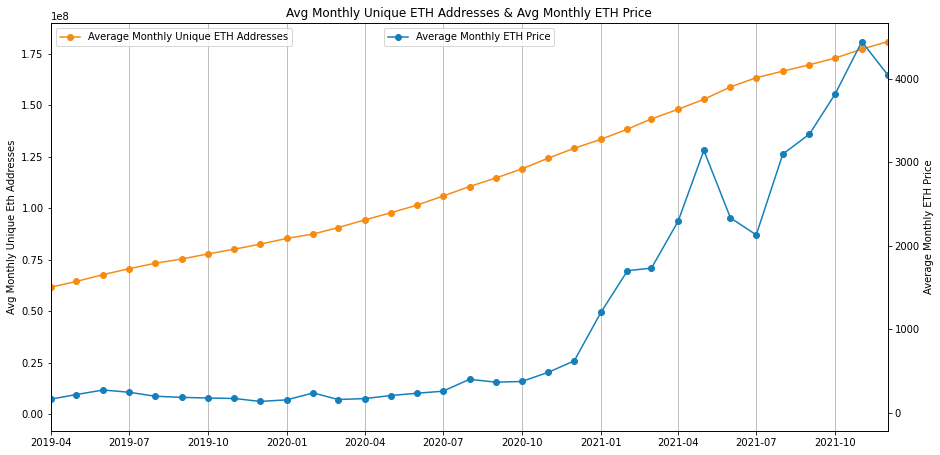

In [64]:
#create another figure, plotting Avg Monthly Unique ETH Addresses against Avg Monthly ETH Price
fig, ax=plt.subplots()
ax.plot_date(eth_x, eth_df3['Value'], linestyle='solid', color='#f78b12')
ax.set_ylabel('Avg Monthly Unique Eth Addresses')
ax.xaxis.grid()


ax2 = ax.twinx()
ax2.plot_date(eth_x, eth_df3['Closing Price (USD)'], color='#157fbb', linestyle='solid')
ax2.set_ylabel('Average Monthly ETH Price')
ax2.set_xlim(17987.0, 18962.0)
ax2.set_title('Avg Monthly Unique ETH Addresses & Avg Monthly ETH Price')
ax.legend(['Average Monthly Unique ETH Addresses'])
ax2.legend(['Average Monthly ETH Price'], loc=9)